In [1]:
import pandas as pd
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Iris_Final.csv")
df

,Sepal length,Sepal width,Petal length,Petal width,Lable
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
scaler=MinMaxScaler()
df_1=scaler.fit_transform(df)
df_2=pd.DataFrame(df_1,columns=df.columns)
df_2

,Sepal length,Sepal width,Petal length,Petal width,Lable
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


In [4]:
Start=time.time()
agglomerative=AgglomerativeClustering(n_clusters=3,linkage='ward')
agglomerative.fit(df_2)
agglomerative_label=agglomerative.fit_predict(df_2)
print("分群結果:")
print(agglomerative_label)
print("-------------------------")
End=time.time()
print("運算時間: ",End-Start)

分群結果:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
-------------------------
運算時間:  0.009956598281860352


In [5]:
len(agglomerative_label)

150

In [6]:
agglomerative_add=df_2
agglomerative_add['Cluster']=agglomerative_label
agglomerative_add

,Sepal length,Sepal width,Petal length,Petal width,Lable,Cluster
0,0.222222,0.625000,0.067797,0.041667,0.0,1
1,0.166667,0.416667,0.067797,0.041667,0.0,1
2,0.111111,0.500000,0.050847,0.041667,0.0,1
3,0.083333,0.458333,0.084746,0.041667,0.0,1
4,0.194444,0.666667,0.067797,0.041667,0.0,1
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0,0
146,0.555556,0.208333,0.677966,0.750000,1.0,0
147,0.611111,0.416667,0.711864,0.791667,1.0,0
148,0.527778,0.583333,0.745763,0.916667,1.0,0


In [7]:
agglomerative_results=agglomerative_add.groupby("Cluster").sum()
agglomerative_results

,Sepal length,Sepal width,Petal length,Petal width,Lable
Cluster,,,,,
0,31.777778,20.291667,38.576271,40.125000,50.0
1,9.805556,29.541667,3.932203,3.000000,0.0
2,22.722222,16.041667,27.627119,25.541667,25.0


In [9]:
purityList=[]
total=0
for i in range(3):
    purity=agglomerative_results.loc[i].max()/agglomerative_results.loc[i].sum()
    purityList.append(purity)
    total=total+agglomerative_results.loc[i].sum()

In [10]:
print("純度:\n",purityList)
print("總和:\n",total)

純度:
 [0.2765934727065792, 0.6383326127317582, 0.2362651742395265]
總和:
 343.9828154425611


In [11]:
Total_purity=0
for i in range(len(purityList)):
    Total_purity=Total_purity+purityList[i]*(agglomerative_results.loc[i].sum()/total)
print("總純度:\n",Total_purity)

總純度:
 0.3115527302515195


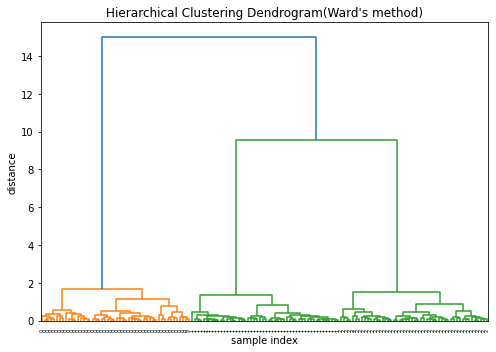

In [12]:
linkage_matrix=linkage(df_2,"ward")
num=plt.figure(figsize=(7,5))
dendrogram(linkage_matrix,labels=agglomerative_label)
plt.title("Hierarchical Clustering Dendrogram(Ward's method)")
plt.xlabel("sample index")
plt.ylabel("distance")
plt.tight_layout()
plt.show()